## Working with the Kaggle Database

In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter

In [2]:
#song_file = pd.HDFStore('kaggle_sample_data_1.h5')
file_paths = glob('MillionSongSubset/data/**/*.h5', recursive=True) #got 10,000 song paths yay!

def get_kaggle(path_list):
    df = pd.DataFrame() #initiate empty data frame to return with all songs
    #for every file path i want to get the song into a data frame
    for path in path_list:
        file = pd.HDFStore('MillionSongSubset/AdditionalFiles/subset_msd_summary_file.h5') #need to open the file from path
        #need to get the dataframe for every song's key to be concat together into one dataframe
        file_df = pd.DataFrame()
        for key in file.keys():
            file_df = pd.concat([file_df, file[key]], axis = 1) #puts everything into a row for the song
        df = df.append(file_df)
        unwanted_columns = ['analysis_sample_rate','analyzer_version', 'artist_7digitalid','artist_familiarity',
                            'artist_id','artist_latitude','artist_longitude','artist_mbid',
                            'artist_playmeid','audio_md5','bars_confidence','bars_start','beats_confidence',
                            'beats_start','end_of_fade_in','idx_bars_confidence','idx_bars_start','idx_beats_confidence',
                            'idx_sections_confidence','idx_sections_start','idx_segments_confidence',
                            'idx_artist_terms','idx_artist_mbtags',
                            'idx_segments_loudness_max','idx_segments_loudness_max_time','idx_segments_pitches',
                            'idx_segments_start','idx_similar_artists','idx_tatums_confidence',
                            'idx_beats_start','idx_segments_loudness_start', 'idx_segments_timbre','idx_tatums_start',
                            'mode_confidence','release','release_7digitalid','sections_confidence',
                            'sections_start','segments_confidence','segments_loudness_max','segments_loudness_max_time',
                            'segments_loudness_start','segments_pitches','segments_start','segments_timbre',
                            'similar_artists','song_id','start_of_fade_out','tatums_confidence','tatums_start',
                            'time_signature_confidence','track_7digitalid','track_id']
        df.drop(unwanted_columns, errors = 'ignore', inplace = True, axis = 1)
        file.close()
        return df


In [3]:

#! MillionSongSubset/data/A/R/R/TRARRZU128F4253CA2.h5'
#get_kaggle(file_paths)

In [4]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

/Users/jennwon/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
kaggle_df = get_kaggle(['MillionSongSubset/AdditionalFiles/subset_msd_summary_file.h5'])
#plt.hist(kaggle_df.year.values)
#print(len(kaggle_df))
all_years = kaggle_df.year
#print(Counter(all_years))


#apply a filter to get rid of songs before 1958 billboards available and songs without a year == 0
year_mask = ((kaggle_df.year != 0) &  (kaggle_df.year < 1958))
#print(kaggle_df.loc([year_mask]))

kaggle_df = kaggle_df.drop(kaggle_df[year_mask].index)
#len(kaggle_df_test)
kaggle_df

,danceability,duration,energy,key,key_confidence,loudness,mode,tempo,time_signature,artist_hotttnesss,artist_location,artist_name,genre,song_hotttnesss,title,year
0,0.0,280.21506,0.0,5,0.555,-3.306,1,173.205,5,0.574275,"Atlanta, GA",Mastodon,,0.597641,Deep Sea Creature,2001
1,0.0,191.68608,0.0,0,0.501,-10.764,1,150.955,4,0.420570,,Los Chichos,,NaN,No Quieras Marcharte,1984
2,0.0,222.92853,0.0,1,0.329,-9.035,1,93.056,4,0.406686,,Foxy Brown,,0.588922,If I...,0
3,0.0,278.38649,0.0,7,0.313,-23.095,1,127.113,1,0.291265,,Ramón Vargas;Vladimir Jurowski,,NaN,Werther - Lyric Drama in four Acts/Act I/Alors...,0
4,0.0,89.15546,0.0,2,0.000,-20.359,1,90.660,3,0.395710,"Belgica -- Namur, Namur/Ghent, East Flanders",Enthroned,,NaN,Ad Te Clamamus Exsvles Mortva Liberi,2010
5,0.0,255.73832,0.0,9,0.556,-5.724,1,101.167,1,0.555138,"Cleveland, OH",Bone Thugs-N-Harmony,,0.474055,Murder One,2000
6,0.0,239.59465,0.0,2,0.167,-10.653,1,173.841,3,0.430300,ITALY,Utopia,,NaN,On My Feet Again,0
7,0.0,156.96934,0.0,4,0.772,-20.816,0,127.547,1,0.750427,UK,Muse,,0.652836,Bedroom Acoustics,0
8,0.0,197.19791,0.0,4,0.665,-29.750,1,127.782,4,0.471224,,João Gilberto,,0.631601,Segredo,2000
9,0.0,262.58240,0.0,9,0.317,-5.644,1,90.013,5,0.342765,,Niraj Chag,,NaN,Sajana (Ft Faheem Mazhar),0


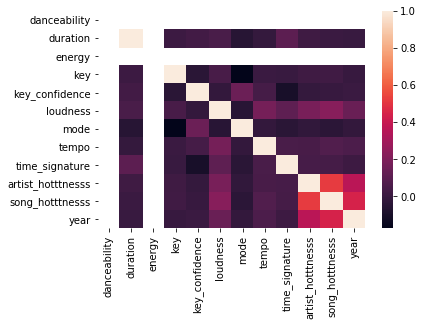

In [6]:
kaggle_heatmap = sns.heatmap(kaggle_df.corr())

fig = kaggle_heatmap.get_figure()
fig.savefig('kaggle_heatmap.png', dpi=300) 

## I have the complete data frame from Billboards now!

In [7]:
all_pickles = glob('Jomas_Pickle/*.pkl', recursive=True)
#print(all_pickles)

def unpickle():
    #count = 0
    #len(list_of_paths)
    complete_df = pd.read_pickle('2010_songs.pkl')
    """list_of_df = []
    for pickle in list_of_paths:
        #count = count +1
        #print(count)
        #print(pickle)
        df = pd.read_pickle(pickle)
        list_of_df.append(df)
    #print(list_of_df)
    complete_df = pd.concat(list_of_df)"""
    complete_df.Artist = complete_df.Artist.str.strip()
    complete_df.Song = complete_df.Song.str.strip()
    
    
    Artist = complete_df.Artist.tolist()
    artist_list = []
    for artist in Artist:
        try:
            artist = artist.split(' Featuring')[0]
        except:
            pass
        try:
            artist = artist.split(' featuring')[0]
        except:
            pass
        try:
            artist = artist.split('(Featuring')[0]
        except:
            pass
        try:
            artist = artist.split('(featuring')[0]
        except:
            pass
        try:
            artist = artist.split(' Feat')[0]
        except:
            pass
        try:
            artist = artist.split('[feat')[0]
        except:
            pass
        try:
            artist = artist.split(' &')[0]
        except:
            pass
        artist_list.append(artist)
    complete_df.Artist = artist_list
    
    #complete_df.columns = complete_df.columns.map(str.strip)
    return complete_df

kaggle_df.rename(columns = {'artist_name': 'Artist', 'title': 'Song'}, inplace = True)

counts = unpickle()
counts.to_pickle('billboards_without_week_ranks.pkl')
counts = pd.DataFrame(counts.groupby(['Artist','Song']).size())
counts.reset_index(inplace = True)

#counts

## Now I want to be able to merge this dataset with Kaggle based on the song and artist indexes

In [8]:
counts.sort_values(0, ascending = False) #27k songs

,Artist,Song,0
10585,Imagine Dragons,Radioactive,87
339,AWOLNATION,Sail,79
11367,Jason Mraz,I'm Yours,76
14147,LeAnn Rimes,How Do I Live,69
17506,OneRepublic,Counting Stars,68
13963,LMFAO,Party Rock Anthem,68
11759,Jewel,Foolish Games/You Were Meant For Me,65
443,Adele,Rolling In The Deep,65
4081,Carrie Underwood,Before He Cheats,64
24121,The Lumineers,Ho Hey,62


In [ ]:
#i want to join these dataframes differently so that i fill in NaN with 0 in num_weeks

# left_merged = kaggle_df.merge(counts, how = 'left')
# left_merged.rename(columns = {left_merged.columns[-1]: 'num_weeks'}, inplace = True)
# left_merged['num_weeks']=left_merged['num_weeks'].fillna(0)
# #left_merged.head(5)

# right_merged = kaggle_df.merge(counts, how = 'right')
# right_merged.rename(columns = {right_merged.columns[-1]: 'num_weeks'}, inplace = True)
# right_merged['num_weeks']=right_merged['num_weeks'].fillna(0)
# #right_merged

# inner_merged = kaggle_df.merge(counts, how = 'inner')
# inner_merged.rename(columns = {inner_merged.columns[-1]: 'num_weeks'}, inplace = True)
# inner_merged['num_weeks']=inner_merged['num_weeks'].fillna(0)
# inner_merged

#right_merged.head(5)

## Inner merged dataframe reduces data set to significantly smaller amount

In [ ]:
# kaggle_heatmap = sns.heatmap(inner_merged.corr())
# fig = kaggle_heatmap.get_figure()
# #fig.savefig('kaggle_heatmap_with_weeks.png', dpi=1000) 

# correlation = inner_merged.corr()
# correlation.num_weeks.sort_values(ascending = False)
# inner_merged.to_pickle('inner_merged_df.pkl')

## Left Merged (Kaggle) provides additional information bc includes songs that don't make the top 100

In [ ]:


# kaggle_heatmap = sns.heatmap(left_merged.corr())
# fig = kaggle_heatmap.get_figure()
# #fig.savefig('kaggle_heatmap_with_weeks.png', dpi=1000) 

# correlation = left_merged.corr()
# correlation.num_weeks.sort_values(ascending = False)

## Right merged (counts) provides better understanding of what makes a song popular bc disregards songs that didn't make it into the Top 100

In [ ]:
# kaggle_heatmap = sns.heatmap(right_merged.corr())
# fig = kaggle_heatmap.get_figure()
# #fig.savefig('kaggle_heatmap_with_weeks.png', dpi=1000) 

# correlation = right_merged.corr()
# correlation.num_weeks.sort_values(ascending = False)

In [ ]:
#merged.to_pickle('kaggled_merged_with_billboard.pkl')

In [ ]:
#print(complete_df.columns, kaggle_df.columns)

## What if I merge on outer, what kind of information will I need to find to paint a more complete picture

It gives me 41k rows to work with. From there, I am hoping to fill in missing information by utilizing the Spotify API

In [9]:
outer_merged = kaggle_df.merge(counts, how = 'outer')
outer_merged.rename(columns = {outer_merged.columns[-1]: 'num_weeks'}, inplace = True)
outer_merged['num_weeks']=outer_merged['num_weeks'].fillna(0)
outer_merged.to_pickle('outer_merged_df.pkl')

In [17]:
#reference of pitch class: https://en.wikipedia.org/wiki/Pitch_class
#using counter for the key columns tells me that i need to clean all values not 0-11 bc each nan is individual for some reason

len(outer_merged)

#Counter(outer_merged.key)

37424

In [10]:
outer_merged.Artist #37k songs

0                              Mastodon
1                           Los Chichos
2                            Foxy Brown
3        Ramón Vargas;Vladimir Jurowski
4                             Enthroned
5                  Bone Thugs-N-Harmony
6                                Utopia
7                                  Muse
8                         João Gilberto
9                            Niraj Chag
10                             Portable
11                      Daniel Johnston
12                    Christian McBride
13              String Trio Of New York
14                          Jim Kweskin
15                        Ultraviolence
16                            Speedball
17                          Autumnblaze
18                   Kris Kristofferson
19                               Cinder
20                Sister Rosetta Tharpe
21                         George Lopez
22                          Johnny Cash
23                              Hatesex
24                         Rui Da Silva
